# Data Pre-Proscessing

In [431]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [432]:
data=pd.read_csv("Bengaluru_House_Data.csv")

In [433]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [434]:
data.info()
#Analysing data and seeing null value distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [394]:
#Seeing the frequency of data in each colunm/for each attriburte

for attribute in data.columns:
    print(data[attribute].value_counts())
    print()
    print("-"*20)
    print()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

--------------------

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

--------------------

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

--------------------

2 BHK         5199
3 BHK  

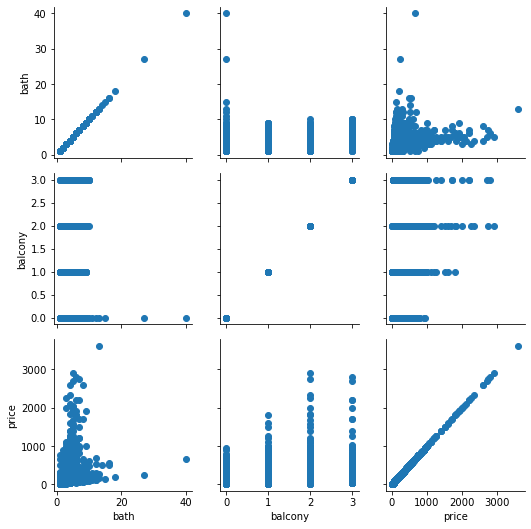

In [435]:
#Visualizing data to get correlation between numerical terms
g=sns.PairGrid(data)
g.map(plt.scatter)

In [396]:
#Seeing where all the null values lie to correct them
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [436]:
#Now we start to first giving uniformity to all values of attributes and remove redundant attributes

In [437]:
#Fixing total Square feet problem by uniformizing the data
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [438]:
def convertRange(x):
    temp=x.split("-")
    if len(temp)==2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [439]:
data["total_sqft"]=data["total_sqft"].apply(convertRange)

In [440]:
#Creating new Colunm in dataframe called price per square foot
data["Price_Per_Sqft"]=((data["price"]*100000))/((data["total_sqft"]))

In [441]:
#Correcting Availability colunm changing it to either: ready to move in OR not ready to move in

new_lst=[]
for value in data["availability"]:
    if value == "Ready To Move":
        a="Ready To Move"
    else:
        a="Not Ready To Move"
    
    new_lst.append(a)
    
data["Availability"]=new_lst

In [442]:
#Filling missing values in no.of bathrooms and then
#Correcting size colunm by giving it uniformity by only having number of bedrooms and nothing else

data["size"]=data["size"].fillna("2 BHK")    #Filling it with 2 bhk since 2bhk appears max times 

no_rooms=[]
for room in data["size"]:
    a=room.split(" ")
    b=a[0]
    no_rooms.append(int(b))

data["BHK"]=no_rooms

In [443]:
#Removing Redundant attributes:
data.drop(columns=["area_type","society","balcony","availability","size"],inplace=True)    #Inplace = true creates deep copy

In [444]:
data.head(10)

,location,total_sqft,bath,price,Price_Per_Sqft,Availability,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,3699.810606,Not Ready To Move,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4615.384615,Ready To Move,4
2,Uttarahalli,1440.0,2.0,62.00,4305.555556,Ready To Move,3
3,Lingadheeranahalli,1521.0,3.0,95.00,6245.890861,Ready To Move,3
4,Kothanur,1200.0,2.0,51.00,4250.000000,Ready To Move,2
5,Whitefield,1170.0,2.0,38.00,3247.863248,Ready To Move,2
6,Old Airport Road,2732.0,4.0,204.00,7467.057101,Not Ready To Move,4
7,Rajaji Nagar,3300.0,4.0,600.00,18181.818182,Ready To Move,4
8,Marathahalli,1310.0,3.0,63.25,4828.244275,Ready To Move,3
9,Gandhi Bazar,1020.0,6.0,370.00,36274.509804,Ready To Move,6


In [445]:
#Seeing where all the null values lie to correct them
data.isna().sum()

location           1
total_sqft        46
bath              73
price              0
Price_Per_Sqft    46
Availability       0
BHK                0
dtype: int64

In [446]:
data["location"].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [447]:
#Filling that 1 missing location with maximum recurring location
data["location"]=data["location"].fillna("Whitefield")

In [448]:
data["bath"].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [449]:
#Filling multiple missing bath values with median bath value
data["bath"]=data["bath"].fillna(int(2))

In [450]:
#Verifying that data has no missing values anymore except case of area
data.isna().sum()

location           0
total_sqft        46
bath               0
price              0
Price_Per_Sqft    46
Availability       0
BHK                0
dtype: int64

In [451]:
data.describe()

,total_sqft,bath,price,Price_Per_Sqft,BHK
count,13274.000000,13320.000000,13320.000000,1.327400e+04,13320.000000
mean,1559.626694,2.688814,112.565627,7.907501e+03,2.802778
std,1238.405258,1.338754,148.971674,1.064296e+05,1.294496
min,1.000000,1.000000,8.000000,2.678298e+02,1.000000
25%,1100.000000,2.000000,50.000000,4.266865e+03,2.000000
50%,1276.000000,2.000000,72.000000,5.434306e+03,3.000000
75%,1680.000000,3.000000,120.000000,7.311746e+03,3.000000
max,52272.000000,40.000000,3600.000000,1.200000e+07,43.000000


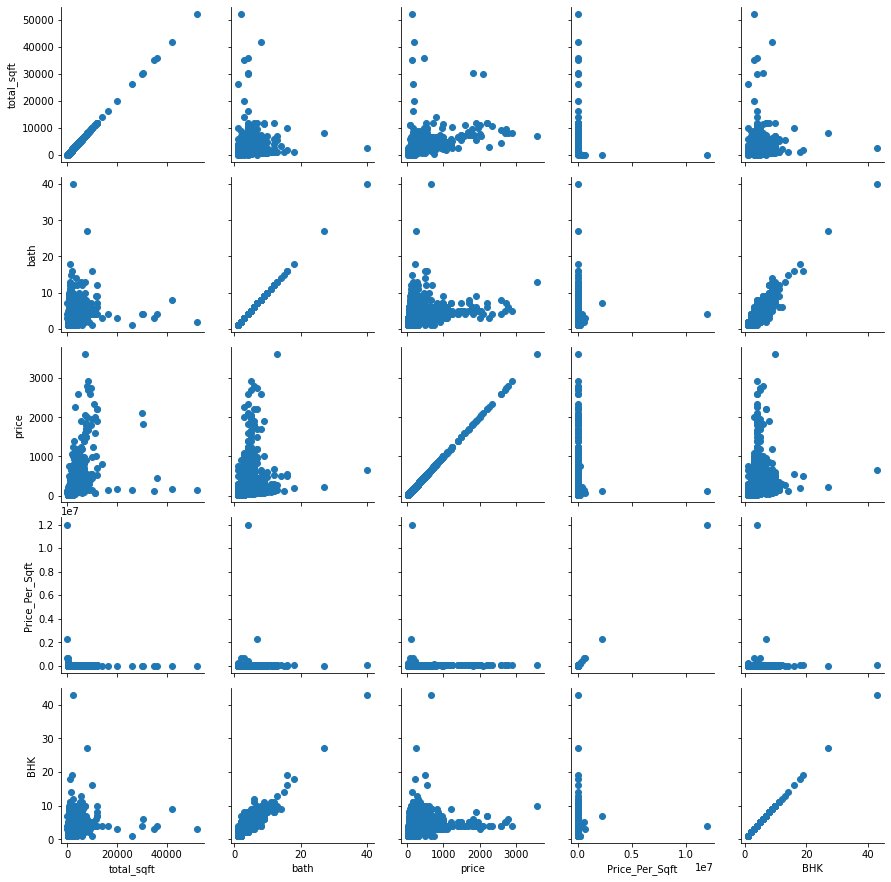

In [452]:
g1=sns.PairGrid(data)
g1.map(plt.scatter)

In [453]:
#Now that our data is removed of missing values and uniformized and the attribures have been narrowed
#We now narrow down the values of each attribute by removing outliers

In [454]:
#Narrowing values of location:

data["location"]=data["location"].apply(lambda x: x.strip())
location_count=data["location"].value_counts()

location_count_reduced=location_count[location_count<=10]
location_count_reduced

new_loc=[]

for loc in data["location"]:
    if loc in location_count_reduced:
        a="other"
    else:
        a=loc
    new_loc.append(a)
data["Locations"]=new_loc

data.drop(columns=["location"],inplace=True)

In [455]:
#Removing outliers for total area:

(data["total_sqft"]/data["BHK"]).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [456]:
#Selecting only those flats where sqft per bhk >=300 as otherwise practically not feasible to live otherwise
data=data[(data["total_sqft"]/data["BHK"])>=300]
data.describe()

,total_sqft,bath,price,Price_Per_Sqft,BHK
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,6303.979357,2.650838
std,1261.271296,1.077938,152.077329,4162.237981,0.976678
min,300.000000,1.000000,8.440000,267.829813,1.000000
25%,1116.000000,2.000000,49.000000,4210.526316,2.000000
50%,1300.000000,2.000000,70.000000,5294.117647,3.000000
75%,1700.000000,3.000000,115.000000,6916.666667,3.000000
max,52272.000000,16.000000,3600.000000,176470.588235,16.000000


In [457]:
data.shape

(12530, 7)

<AxesSubplot:xlabel='Price_Per_Sqft', ylabel='Density'>

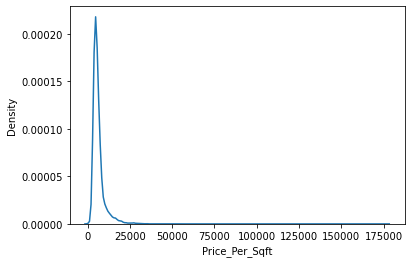

In [458]:
#Removing outliers for price per sqft:
#We will find mean and standard deviation of PPSQFT of each value grouped by location 
#and only select those that lie in the range mean +- 1 standard deviation

sns.kdeplot(data["Price_Per_Sqft"])

In [459]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    
    for key,subdf in df.groupby("Locations"):
        mean=np.mean(subdf.Price_Per_Sqft)
        standev=np.std(subdf.Price_Per_Sqft)
        
        selected_subdf=subdf[(subdf.Price_Per_Sqft> mean-standev) & (subdf.Price_Per_Sqft<= mean+standev)]
        df_output=pd.concat([df_output,selected_subdf],ignore_index=True)
    return df_output

data=remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,price,Price_Per_Sqft,BHK
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,5659.062876,2.574896
std,880.694214,0.979449,86.342786,2265.774749,0.897649
min,300.000000,1.000000,10.000000,1250.000000,1.000000
25%,1110.000000,2.000000,49.000000,4244.897959,2.000000
50%,1286.000000,2.000000,67.000000,5175.600739,2.000000
75%,1650.000000,3.000000,100.000000,6428.571429,3.000000
max,30400.000000,16.000000,2200.000000,24509.803922,16.000000


<AxesSubplot:xlabel='Price_Per_Sqft', ylabel='Density'>

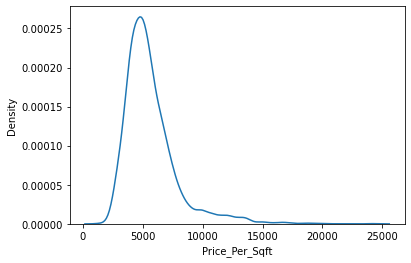

In [460]:
#Deviation graph after outlier removal
sns.kdeplot(data["Price_Per_Sqft"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK', ylabel='count'>

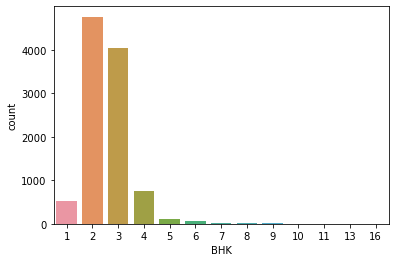

In [461]:
#Removing outliers for BHK:
#We See that 98.9 Percent of the flats lie in range of BHKs 1-5 so we remove the outliers
#Outliers- appartments with BHK 6 or more
sns.countplot(data["BHK"])

In [462]:
data["BHK"].value_counts()

2     4760
3     4030
4      763
1      526
5      110
6       62
7       19
8       16
9        8
10       3
11       2
16       1
13       1
Name: BHK, dtype: int64

In [463]:
data=data[data["BHK"]<=5]
data["BHK"].value_counts()

2    4760
3    4030
4     763
1     526
5     110
Name: BHK, dtype: int64

In [464]:
data.shape

(10189, 7)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bath', ylabel='count'>

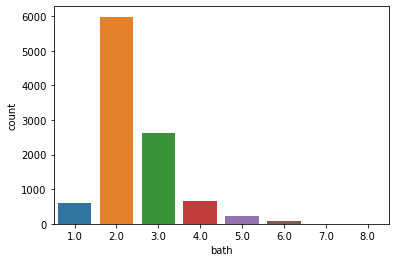

In [465]:
#Removing outliers for Baths:
#We See that 97 Percent of the flats lie in range of baths 1-4 so we remove the outliers
#Outliers- appartments with baths 5 or more
sns.countplot(data["bath"])

In [466]:
data["bath"].value_counts()

2.0    5984
3.0    2622
4.0     666
1.0     615
5.0     227
6.0      68
7.0       6
8.0       1
Name: bath, dtype: int64

In [467]:
data=data[data["bath"]<5]
data["bath"].value_counts()

2.0    5984
3.0    2622
4.0     666
1.0     615
Name: bath, dtype: int64

In [468]:
data.shape

(9887, 7)

In [471]:
#We created price per sqaure feet colunm only for outlier reomval and other data compression approaches 
#so now we remove it since we have no use for it anymore

data.drop(columns=["Price_Per_Sqft"],inplace=True)

In [ ]:
#Finally now we have obtained our clean data and this is what we will be working with

In [472]:
data.head()

,total_sqft,bath,price,Availability,BHK,Locations
0,2850.0,4.0,428.0,Not Ready To Move,4,1st Block Jayanagar
1,1630.0,3.0,194.0,Not Ready To Move,3,1st Block Jayanagar
2,1875.0,2.0,235.0,Ready To Move,3,1st Block Jayanagar
3,1200.0,2.0,130.0,Not Ready To Move,3,1st Block Jayanagar
4,1235.0,2.0,148.0,Not Ready To Move,2,1st Block Jayanagar


In [473]:
#Saving data to csv file with which we will work on in another notebook

data.to_csv("Bengaluru_House_Data_Cleaned.csv")